# Computationally Visuallizing Crystals
<b> Christina Lee

Category: General

Prerequisites:</b> none


In condensed matter, we find ourselves in the interesting middle ground of dealing with large numbers $10^{23}$ of extremely small particles, ex. atoms, electrons.  

Luckily, the particles don't each do their own thing, but often come in nice, structured, repeated units.  <i>Lattices</i>.  So as our first step into the field, we will look at the most basic type, a <i>Bravais Lattice</i>.  

In a Bravais Lattice, every site looks like every other site. Mathematically, we use three vectors, $\vec{a},\vec{b},\vec{c}$ to express how we move from one site to a neighbor.

\begin{equation}
\mathbf{R}_{lmn}=l \vec{a} + m \vec{b} + n \vec{c}  \;\;\;\; \text{for } l,m,n \in \mathbb{N}
\end{equation}

To keep things working out right, we have to put a constraint on these vectors; that we can't get one from scaling and adding the other two.  If we could, then we couldn't put sites in an entire 3 dimensional space.

Stay tuned for a later post where we explore more elaborate lattices.  



In [13]:
# importing our packages
using Plots
gr()

Plots.GRBackend()

## Define The Relevant Variables
Choose the lattice you want to look at, and put that string into the lattice variable.  
Current options:
<ul>
    <li> Simple Cubic = "sc"
    <li> Plane triangular lattice = "pt"
    <li> Body-Centered Cubic = "bcc"
    <li> Face-Centered Cubic = "fcc"
</ul>

Note: Square is Simple Cubic for Nz=1

14 distinct lattice types are possible, but these common four give the important ideas.

Also, input the size of lattice you want to look at.

In [50]:
lattice="fcc";

Nx=3;
Ny=2;
Nz=3;

## The Lattice vectors

In [51]:
# A cell to just evaluate
# This one sets the unit vectors (a,b,c) for the different unit cells
# Can you guess what a lattice will look like by looking at the vectors?
if(lattice=="sc")
    d=3;
    a=[1,0,0];
    b=[0,1,0];
    c=[0,0,1];
elseif(lattice=="pt")
    d=2;
    a=[1,0,0];
    b=[.5,sqrt(3)/2,0];
    c=[0,0,1];
elseif(lattice=="bcc")
    d=3;
    a=[.5,.5,.5];
    b=[.5,.5,-.5];
    c=[.5,-.5,.5];
elseif(lattice=="fcc")
    d=3;
    a=[.5,.5,0];
    b=[.5,0,.5];
    c=[0,.5,.5];
end
"Cell Finished"

"Cell Finished"

# Creating the Position arrays

Now we have everything we need about the specific lattice we want to look at.  From here on out, everything is completely general for any Bravais Lattice.

## Some helpful variables
The variables created in the next cell just make computation a bit easier, get the above variables into nicer forms.

In [52]:
# Another cell to just evaluate
N=Nx*Ny*Nz;    #The total number of sites

#these allow us to copy an entire row or layer at once
aM=transpose(a);
bM=transpose(repeat(b,outer=[1,Nx])); 
cM=transpose(repeat(c,outer=[1,Nx*Ny]));

X=Array{Float64}(undef,N,3);  #where we store the positions
"Cell Finished"

"Cell Finished"

## Entering the Position Values
Here, we first initialize a first row, then tile the first plane with the first row.
Afterward, we can tile the entire lattice with that first plane.

In [53]:
# Another cell to just evaluate
# Here we are actually calculating the positions for every site
for i in 1:Nx    #for the first row
    X[i,:]=(i-1)*a;
end

for j in 2:Ny    #copying the first row into the first layer
    X[Nx*(j-1).+(1:Nx),:]=X[1:Nx,:].+(j-1)*bM;
end

for j in 2:Nz    #copying the first layer into the entire cube
    X[Ny*Nx*(j-1).+(1:Nx*Ny),:]=X[1:Nx*Ny,:].+(j-1)*cM;
end

#### Programming Tip: 

In Julia, ranges, like `1:Nx`, are a special variable type that can be manipulated.  We can add numbers to them:
`3+(1:3)=4:6`,
or add a minus sign to force it to iterate in the opposite direction, though with different start/stop:
`-(1:3)=-1:-1:-3`

<b>Danger!</b> Make sure to use the parentheses around the range if you are performing these operations.

## Plotting

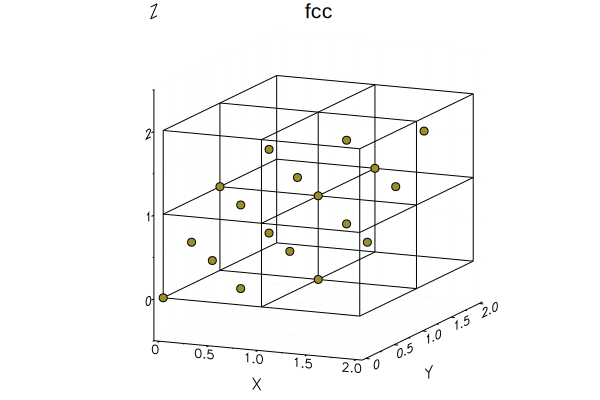

In [56]:
plot(legend=false,title=lattice,xlabel="X",ylabel="Y",zlabel="Z")

ls=2
v=collect(0:ls)
zed=zeros(length(v))
for ii in 0:ls
    for jj in 0:ls
        plot!(zed .+ii,v,zed .+jj,linecolor=:black)
        plot!(zed .+ii,zed .+jj,v,linecolor=:black)
        plot!(v, zed .+ii,zed .+jj,linecolor=:black)
    end
end

scatter!(X[:,1],X[:,2],X[:,3])

## Go Back and Fiddle! 
As you might have noticed, this isn't just a blog where you just read through it. Interact with it. Change some lines, and see what happens. I choose body centered cubic to display first, but what do the other lattices look like?


Look at different lattice sizes.

Can you hand draw them on paper?
![A hand drawing](../images/CrystalShapes/handdraw2.jpg)